In [1]:
import sys
import os
import glob
sys.path.append("../")
from yoloneatviz import HolovizNapari
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot  as plt
from natsort import natsorted
import numpy as np

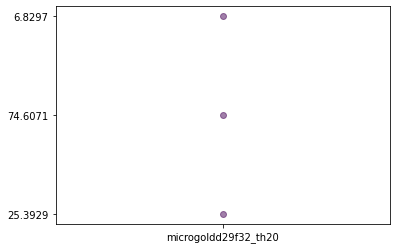

,MovieName,NetworkName,CellType,True Positives,False Negatives,False Positives
0,DivisionLocationwt_mov12_SW30,microgoldd29f32_th20,Division,25.3929,74.6071,6.8297


In [2]:
thresholdspace = 40
thresholdtime = 10
thresholdscore = 1 -  1.0E-4
MovieName = []
NetworkName = []
CellName = []
Accuracy = []
FNAccuracy = []
FPAccuracy = []
NetName = 'microgoldd29f32_th20'
resultsdir = '/Users/aimachine/oneat_analysis/WildType/Golds/AccuracyResults/'
Path(resultsdir).mkdir(exist_ok=True)
csv_gt = '/Users/aimachine/oneat_analysis/WildType/DivisionLocationwt_mov12_SW30.csv'

csv_pred = '/Users/aimachine/oneat_analysis/WildType/Golds/' + NetName + '/DivisionLocationwt_mov12_SW30.csv'
Name = os.path.basename(os.path.splitext(csv_pred)[0])
tp, fn, fp = HolovizNapari.TruePositives(csv_gt, csv_pred, thresholdscore = thresholdscore, thresholdspace = thresholdspace, thresholdtime = thresholdtime)
MovieName.append(Name)
NetworkName.append(NetName)
CellName.append('Division')
Accuracy.append(str('%.4f'%tp))
FNAccuracy.append(str('%.4f'%fn))
FPAccuracy.append(str('%.4f'%fp))
df = pd.DataFrame(list(zip(MovieName,NetworkName,CellName,Accuracy, FNAccuracy,FPAccuracy)), index = None, 
                                                                      columns =['MovieName', 'NetworkName', 'CellType',  'True Positives', 'False Negatives', 'False Positives'])
                        
df.to_csv(resultsdir + '/' + NetName+  'DivisionDynamicAccuracy' +  '.csv')  
df

Accuracy = natsorted(Accuracy, reverse = True)
FNAccuracy = natsorted(FNAccuracy, reverse = True)
FPAccuracy = natsorted(FPAccuracy, reverse = True)
colors = np.random.rand(len(Accuracy))
plt.scatter(NetworkName, Accuracy,  alpha=0.5, c = colors)

colors = np.random.rand(len(FNAccuracy))
plt.scatter(NetworkName, FNAccuracy,  alpha=0.5, c = colors)
colors = np.random.rand(len(FPAccuracy))
plt.scatter(NetworkName, FPAccuracy,  alpha=0.5, c = colors)

plt.savefig(resultsdir + '/' + NetName +  'FullDynamicaccuracy' + '.png', dpi = 300)
plt.show()
df